# Data Preprocess - CNR Challenge

## Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
sns.set_style('darkgrid')

## Read Data

In [2]:
x_train = pd.read_csv('Data/X_train.csv')
y_train = pd.read_csv('Data/Y_train.csv')
x_test = pd.read_csv('Data/X_test.csv')

## About the Data

The presented data basically contains predictions for three weather variables that can be relevant to forecast Wind Energy Production: Wind Speed (In two directions), Temperature and Cloud Cover (%). These predictions are made by four different NWP (Numerical Weather Prediction) systems, on three different days (Two days before, One day before and on the same day of the prediction) and, depending on the NWP considered, in two or four different hours in each day (00h and 12h, or 00h, 06h, 12h and 18h).

Detailing a little more, for each NWP is presented:

* NWP1: Wind Speeds (U and V), for 100m high, and Temperature for hours {00h,06h,12h,18h};
* NWP2: Wind Speeds (U and V), for 100m high, for hours {00h,12h};
* NWP3: Wind Speeds (U and V), for 100m high, and Temperature for hours {00h,06h,12h,18h};
* NWP4: Wind Speeds (U and V), for 10m high, and Cloud Cover for hours {00h,12h}.

Obs.: A also important point here is that NWP2 and NWP3 only make 3 hourly predictions.

This generate a train dataset with 105 columns, as can be seen above.

In [3]:
x_train.head(5)

,ID,WF,Time,NWP1_00h_D-2_U,NWP1_00h_D-2_V,NWP1_00h_D-2_T,NWP1_06h_D-2_U,NWP1_06h_D-2_V,NWP1_06h_D-2_T,NWP1_12h_D-2_U,...,NWP4_00h_D-1_CLCT,NWP4_12h_D-1_U,NWP4_12h_D-1_V,NWP4_12h_D-1_CLCT,NWP4_00h_D_U,NWP4_00h_D_V,NWP4_00h_D_CLCT,NWP4_12h_D_U,NWP4_12h_D_V,NWP4_12h_D_CLCT
0,1,WF1,01/05/2018 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.254603,-0.289687,82.543144,NaN,NaN,NaN
1,2,WF1,01/05/2018 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.490908,-0.413370,99.990844,NaN,NaN,NaN
2,3,WF1,01/05/2018 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.997093,-1.415138,98.367235,NaN,NaN,NaN
3,4,WF1,01/05/2018 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.689598,-0.961441,94.860604,NaN,NaN,NaN
4,5,WF1,01/05/2018 05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.290994,-0.294963,95.905879,NaN,NaN,NaN


For the test set, there's a little difference. It's presented a same dataset structure as the training data, but only predcitions made until day D 00h are provided, for each NWP, as in a practical scenario, this would be the only data available to forecast the energy production. This has to been accouted when defining the Validation Strategy.

In [4]:
x_test.head(5)

,ID,WF,Time,NWP1_00h_D-2_U,NWP1_00h_D-2_V,NWP1_00h_D-2_T,NWP1_06h_D-2_U,NWP1_06h_D-2_V,NWP1_06h_D-2_T,NWP1_12h_D-2_U,...,NWP4_00h_D-1_CLCT,NWP4_12h_D-1_U,NWP4_12h_D-1_V,NWP4_12h_D-1_CLCT,NWP4_00h_D_U,NWP4_00h_D_V,NWP4_00h_D_CLCT,NWP4_12h_D_U,NWP4_12h_D_V,NWP4_12h_D_CLCT
0,37376,WF1,16/01/2019 01:00,-4.5500,-1.5148,279.01,-3.0484,-2.6405,278.01,-3.3630,...,-0.000016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37377,WF1,16/01/2019 02:00,-5.7942,0.4186,279.38,-3.1155,-0.4923,277.86,-3.6398,...,-0.000016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37378,WF1,16/01/2019 03:00,-5.9803,1.0079,280.13,-2.9582,1.1965,277.80,-3.6668,...,-0.000016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37379,WF1,16/01/2019 04:00,-6.1664,0.4983,280.74,-2.5532,2.3753,277.88,-3.8536,...,7.854044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37380,WF1,16/01/2019 05:00,-6.9187,0.2228,280.95,-2.7366,2.4846,278.47,-4.5220,...,-0.000016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here, the Time Column is converted to Datetime format and set as index to make plots with Data in a faster way.

In [5]:
x_train['Time'] = pd.to_datetime(x_train['Time'],infer_datetime_format=True)
x_test['Time'] = pd.to_datetime(x_test['Time'],infer_datetime_format=True)

In [11]:
x_train = x_train.set_index('Time')
x_test = x_test.set_index('Time')

Int64Index([ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
            ...
            15, 15, 15, 15, 15, 15, 15, 15, 15, 16],
           dtype='int64', name='Time', length=37375)

## Problems

So, by this point, two problems need to be solved:

1) Fill the Missing Data for NWP's 2 and 3;

2) Reduce the number of columns to make possible a more meaningful analysis of data on EDA.

### Interpolation of the Missing Values

To solve the problem of missing data on NWP's 2 and 3, first we have to check the data and evaluate if filling those values would be a good idea. So below, an heatmap of NaN Values is plotted, where red colors represent NaN values.

In [6]:
na_matrix = x_train.isna().values

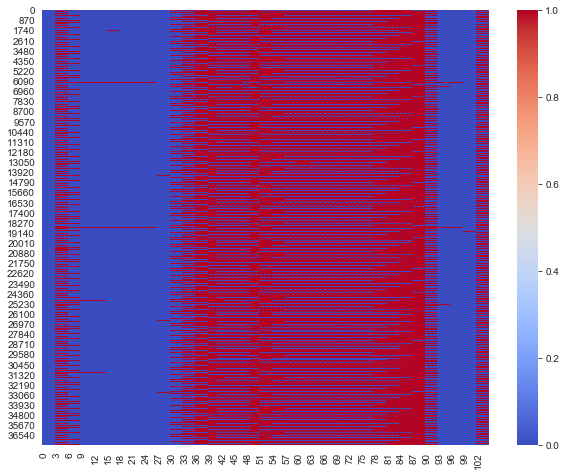

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(na_matrix,cmap='coolwarm')

As mentioned, it's possible to confirm here that the columns representing NWP's around 2 and 3 have the most missing values. Let's check them deeper.

In [8]:
nwps23 = ['NWP2_00h_D-2_U', 'NWP2_00h_D-2_V',
       'NWP2_12h_D-2_U', 'NWP2_12h_D-2_V', 'NWP2_00h_D-1_U',
       'NWP2_00h_D-1_V', 'NWP2_12h_D-1_U', 'NWP2_12h_D-1_V',
       'NWP2_00h_D_U', 'NWP2_00h_D_V', 'NWP2_12h_D_U', 'NWP2_12h_D_V',
       'NWP3_00h_D-2_U', 'NWP3_00h_D-2_V', 'NWP3_00h_D-2_T',
       'NWP3_06h_D-2_U', 'NWP3_06h_D-2_V', 'NWP3_06h_D-2_T',
       'NWP3_12h_D-2_U', 'NWP3_12h_D-2_V', 'NWP3_12h_D-2_T',
       'NWP3_18h_D-2_U', 'NWP3_18h_D-2_V', 'NWP3_18h_D-2_T',
       'NWP3_00h_D-1_U', 'NWP3_00h_D-1_V', 'NWP3_00h_D-1_T',
       'NWP3_06h_D-1_U', 'NWP3_06h_D-1_V', 'NWP3_06h_D-1_T',
       'NWP3_12h_D-1_U', 'NWP3_12h_D-1_V', 'NWP3_12h_D-1_T',
       'NWP3_18h_D-1_U', 'NWP3_18h_D-1_V', 'NWP3_18h_D-1_T',
       'NWP3_00h_D_U', 'NWP3_00h_D_V', 'NWP3_00h_D_T', 'NWP3_06h_D_U',
       'NWP3_06h_D_V', 'NWP3_06h_D_T', 'NWP3_12h_D_U', 'NWP3_12h_D_V',
       'NWP3_12h_D_T', 'NWP3_18h_D_U', 'NWP3_18h_D_V', 'NWP3_18h_D_T']

In [9]:
x_train[nwps23].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37375 entries, 0 to 37374
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NWP2_00h_D-2_U  7734 non-null   float64
 1   NWP2_00h_D-2_V  7734 non-null   float64
 2   NWP2_12h_D-2_U  12324 non-null  float64
 3   NWP2_12h_D-2_V  12324 non-null  float64
 4   NWP2_00h_D-1_U  12420 non-null  float64
 5   NWP2_00h_D-1_V  12420 non-null  float64
 6   NWP2_12h_D-1_U  12372 non-null  float64
 7   NWP2_12h_D-1_V  12372 non-null  float64
 8   NWP2_00h_D_U    12462 non-null  float64
 9   NWP2_00h_D_V    12462 non-null  float64
 10  NWP2_12h_D_U    6207 non-null   float64
 11  NWP2_12h_D_V    6207 non-null   float64
 12  NWP3_00h_D-2_U  7788 non-null   float64
 13  NWP3_00h_D-2_V  7788 non-null   float64
 14  NWP3_00h_D-2_T  7788 non-null   float64
 15  NWP3_06h_D-2_U  10904 non-null  float64
 16  NWP3_06h_D-2_V  10904 non-null  float64
 17  NWP3_06h_D-2_T  10904 non-null 

As it's possible, there are some columns with a lot of Missing Values, with some reaching more than 80%, and for those cases filling them would probably lead to big errors on the time series. So in this case, we prefer to not doing any Interpolation.

In [ ]:
x_train = x_train.interpolate(method='time').fillna(method='bfill')

### Reducing the Number of Columns

In this problem, the idea to solve it can be very simple: Since we are talking about different predictions made for a same variable, it's reasonable to think that in a perfect scenario, they would exactly the same. But because of errors and another factors, they have some differences between them. But still in concept, they would be the same thing, so keeping this big chunck of data will not lead to a gain in information for the method.

At the same time, it's important to remember that each column represents a prediction made by different models (or the same model, but on different situations). So it feels reasonable to rescue the idea behind ensembling models, very popular on Machine Learning field, and apply here, in the sense of grouping all the similar predictions to result in a more precise one, and at the same time, reducing the amount of data considered. 

But before reaching this point, let's do a simple analysis comparing the different predictions just to be sure that they are similar and we won't be losing any important information by doing this aggregation. This analysis is done just on training data, so we are suposing similar behaviour on test data.

For this analysis, we will use only data from one Wind Farm.

In [10]:
WF = 'WF1'
x_train = x_train[x_train['WF']==WF]
x_test = x_test[x_test['WF']==WF]

To begin, let's plot the common Wind Speed predictions made by all NWP's. To be possible to plot all the points, we use here Scatter Plots instead of Line Plots, as this one would not plot correctly the features with a lot of missing values.

In [11]:
def plot_nwps(df,hour,day,feature):
    plt.scatter(df['Time'],df['NWP1_' + hour + '_' + day + '_' + feature],label='NWP1',alpha=0.2,s=10)
    plt.scatter(df['Time'],df['NWP2_' + hour + '_' + day + '_' + feature],label='NWP2',alpha=0.2,s=10)
    plt.scatter(df['Time'],df['NWP3_' + hour + '_' + day + '_' + feature],label='NWP3',alpha=0.2,s=10)
    plt.scatter(df['Time'],df['NWP4_' + hour + '_' + day + '_' + feature],label='NWP4',alpha=0.2,s=10)
    plt.legend()

In [12]:
def subplots_nwps(feature):
    plt.figure(figsize=(15,10))
    plt.subplot(3,2,1)
    plot_nwps(x_train,'00h','D-2',feature)
    plt.title('00h_D-2')
    plt.subplot(3,2,2)
    plot_nwps(x_train,'12h','D-2',feature)
    plt.title('12h_D-2')
    plt.subplot(3,2,3)
    plot_nwps(x_train,'00h','D-1',feature)
    plt.title('00h_D-1')
    plt.subplot(3,2,4)
    plot_nwps(x_train,'12h','D-1',feature)
    plt.title('12h_D-1')
    plt.subplot(3,2,5)
    plot_nwps(x_train,'00h','D',feature)
    plt.title('00h_D')
    plt.subplot(3,2,6)
    plot_nwps(x_train,'12h','D',feature)
    plt.title('12h_D')

For Zonal Wind Speeds (East-West Directions):

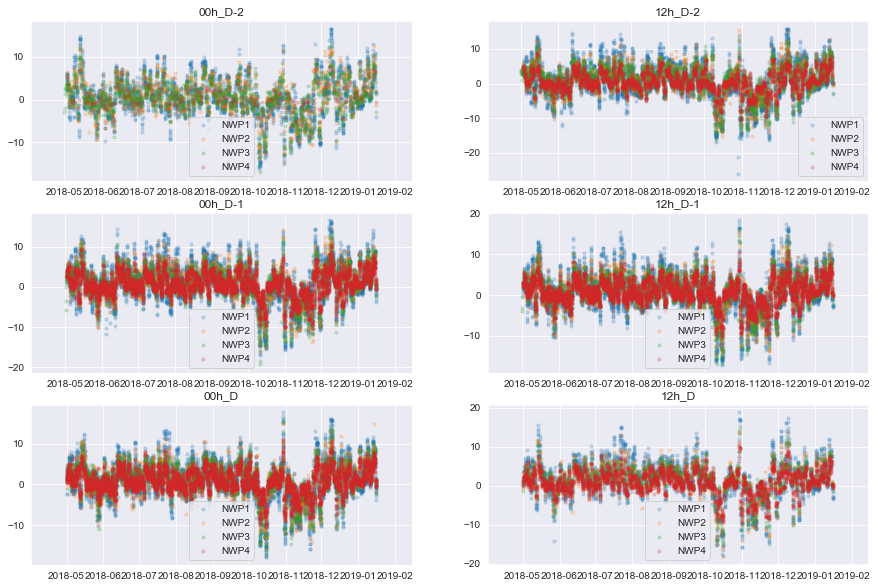

In [13]:
subplots_nwps('U')

For Meridional Wind Speeds (North-South Directions):

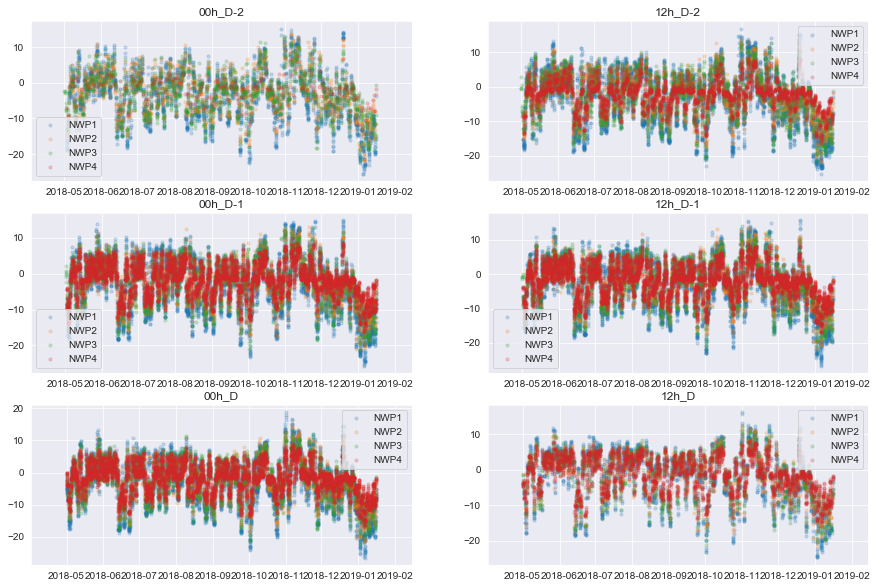

In [14]:
subplots_nwps('V')

We can also compare the distribution of these features using Histograms.

In [15]:
def hist_nwps(df,hour,day,feature):
    plt.hist(df['NWP1_' + hour + '_' + day + '_' + feature],label='NWP1',bins=15,alpha=0.3)
    plt.hist(df['NWP2_' + hour + '_' + day + '_' + feature],label='NWP2',bins=15,alpha=0.3)
    plt.hist(df['NWP3_' + hour + '_' + day + '_' + feature],label='NWP3',bins=15,alpha=0.3)
    plt.hist(df['NWP4_' + hour + '_' + day + '_' + feature],label='NWP4',bins=15,alpha=0.3)
    plt.legend()

In [16]:
def subhist_nwps(feature):
    plt.figure(figsize=(15,10))
    plt.subplot(3,2,1)
    hist_nwps(x_train,'00h','D-2',feature)
    plt.title('00h_D-2')
    plt.subplot(3,2,2)
    hist_nwps(x_train,'12h','D-2',feature)
    plt.title('12h_D-2')
    plt.subplot(3,2,3)
    hist_nwps(x_train,'00h','D-1',feature)
    plt.title('00h_D-1')
    plt.subplot(3,2,4)
    hist_nwps(x_train,'12h','D-1',feature)
    plt.title('12h_D-1')
    plt.subplot(3,2,5)
    hist_nwps(x_train,'00h','D',feature)
    plt.title('00h_D')
    plt.subplot(3,2,6)
    hist_nwps(x_train,'12h','D',feature)
    plt.title('12h_D')

For Zonal Wind Speeds (East-West Directions):

C:\Users\andre_\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\andre_\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


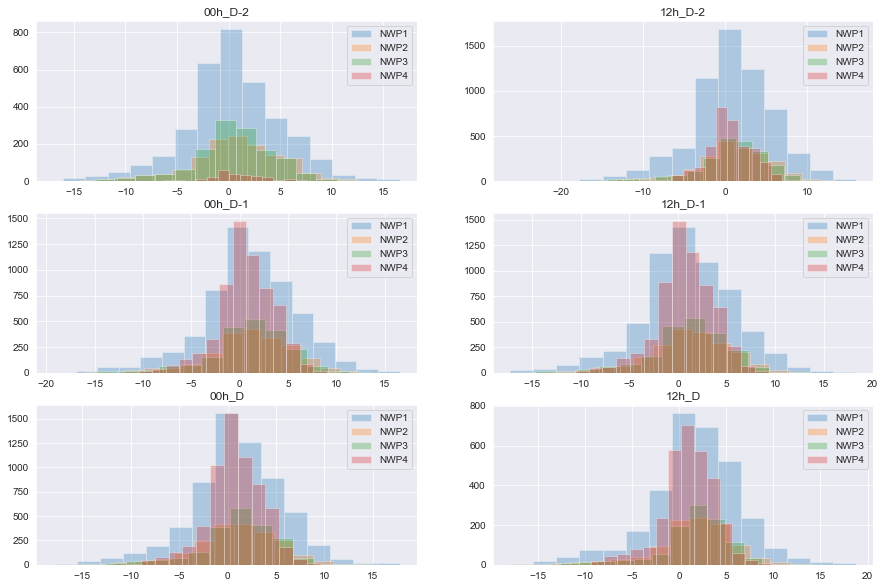

In [17]:
subhist_nwps('U')

For Meridional Wind Speeds (North-South Directions):

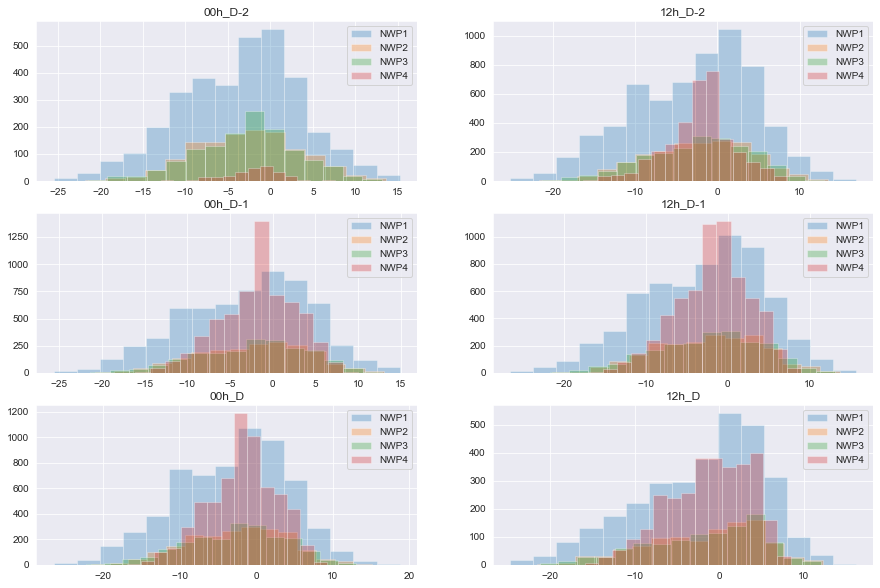

In [18]:
subhist_nwps('V')

For temperature, only NWP's 1 and 3 produce data. Let's compare the values for all common predictions.

In [19]:
def plot_nwps(df,hour,day,feature):
    plt.scatter(df['Time'],df['NWP1_' + hour + '_' + day + '_' + feature],label='NWP1',alpha=0.2,s=10)
    plt.scatter(df['Time'],df['NWP3_' + hour + '_' + day + '_' + feature],label='NWP3',alpha=0.2,s=10)
    plt.legend()

In [20]:
def subplots_nwps(feature):
    plt.figure(figsize=(21,18))
    plt.subplot(3,4,1)
    plot_nwps(x_train,'00h','D-2',feature)
    plt.title('00h_D-2')
    plt.xticks(rotation=45)
    plt.subplot(3,4,2)
    plot_nwps(x_train,'06h','D-2',feature)
    plt.title('06h_D-2')
    plt.xticks(rotation=45)
    plt.subplot(3,4,3)
    plot_nwps(x_train,'12h','D-2',feature)
    plt.title('12h_D-2')
    plt.xticks(rotation=45)
    plt.subplot(3,4,4)
    plot_nwps(x_train,'18h','D-2',feature)
    plt.title('18h_D-2')
    plt.xticks(rotation=45)
    plt.subplot(3,4,5)
    plot_nwps(x_train,'00h','D-1',feature)
    plt.title('00h_D-1')
    plt.xticks(rotation=45)
    plt.subplot(3,4,6)
    plot_nwps(x_train,'06h','D-1',feature)
    plt.title('06h_D-1')
    plt.xticks(rotation=45)
    plt.subplot(3,4,7)
    plot_nwps(x_train,'12h','D-1',feature)
    plt.title('12h_D-1')
    plt.xticks(rotation=45)
    plt.subplot(3,4,8)
    plot_nwps(x_train,'18h','D-1',feature)
    plt.title('18h_D-1')
    plt.xticks(rotation=45)
    plt.subplot(3,4,9)
    plot_nwps(x_train,'00h','D',feature)
    plt.title('00h_D')
    plt.xticks(rotation=45)
    plt.subplot(3,4,10)
    plot_nwps(x_train,'06h','D',feature)
    plt.title('06h_D')
    plt.xticks(rotation=45)
    plt.subplot(3,4,11)
    plot_nwps(x_train,'12h','D',feature)
    plt.title('12h_D')
    plt.xticks(rotation=45)
    plt.subplot(3,4,12)
    plot_nwps(x_train,'18h','D',feature)
    plt.title('18h_D')
    plt.xticks(rotation=45)

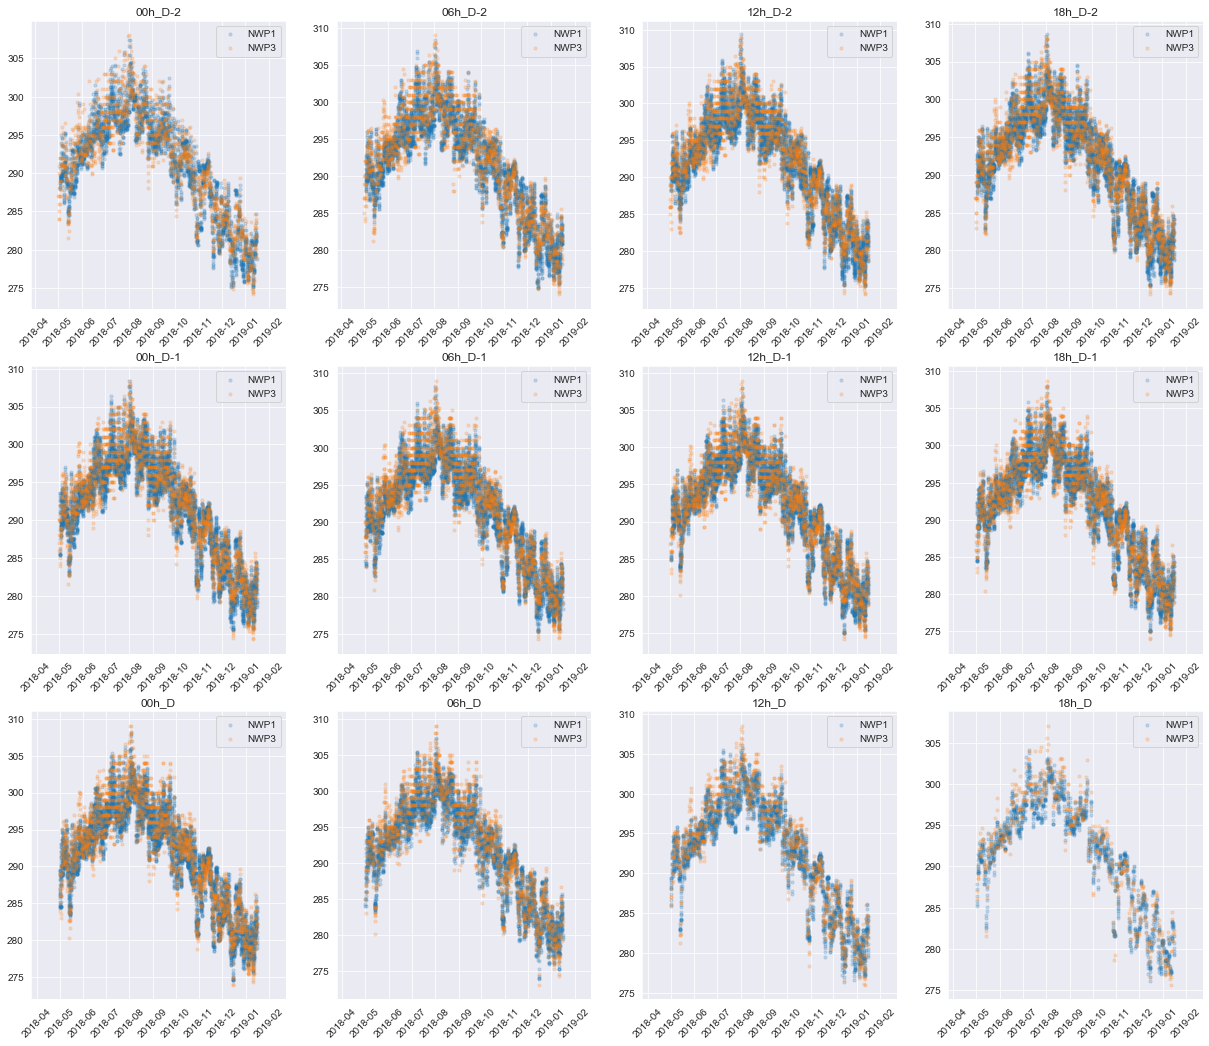

In [21]:
subplots_nwps('T')

Let's also compare the distributions of data here.

In [22]:
def hist_nwps(df,hour,day,feature):
    plt.hist(df['NWP1_' + hour + '_' + day + '_' + feature],label='NWP1',bins=15,alpha=0.3)
    plt.hist(df['NWP3_' + hour + '_' + day + '_' + feature],label='NWP3',bins=15,alpha=0.3)
    plt.legend()

In [23]:
def subhist_nwps(feature):
    plt.figure(figsize=(15,10))
    plt.subplot(3,4,1)
    hist_nwps(x_train,'00h','D-2',feature)
    plt.title('00h_D-2')
    plt.subplot(3,4,2)
    hist_nwps(x_train,'06h','D-2',feature)
    plt.title('06h_D-2')
    plt.subplot(3,4,3)
    hist_nwps(x_train,'12h','D-2',feature)
    plt.title('12h_D-2')
    plt.subplot(3,4,4)
    hist_nwps(x_train,'18h','D-2',feature)
    plt.title('18h_D-2')
    plt.subplot(3,4,5)
    hist_nwps(x_train,'00h','D-1',feature)
    plt.title('00h_D-1')
    plt.subplot(3,4,6)
    hist_nwps(x_train,'06h','D-1',feature)
    plt.title('06h_D-1')
    plt.subplot(3,4,7)
    hist_nwps(x_train,'12h','D-1',feature)
    plt.title('12h_D-1')
    plt.subplot(3,4,8)
    hist_nwps(x_train,'18h','D-1',feature)
    plt.title('18h_D-1')
    plt.subplot(3,4,9)
    hist_nwps(x_train,'00h','D',feature)
    plt.title('00h_D')
    plt.subplot(3,4,10)
    hist_nwps(x_train,'06h','D',feature)
    plt.title('06h_D')
    plt.subplot(3,4,11)
    hist_nwps(x_train,'12h','D',feature)
    plt.title('12h_D')
    plt.subplot(3,4,12)
    hist_nwps(x_train,'18h','D',feature)
    plt.title('18h_D')

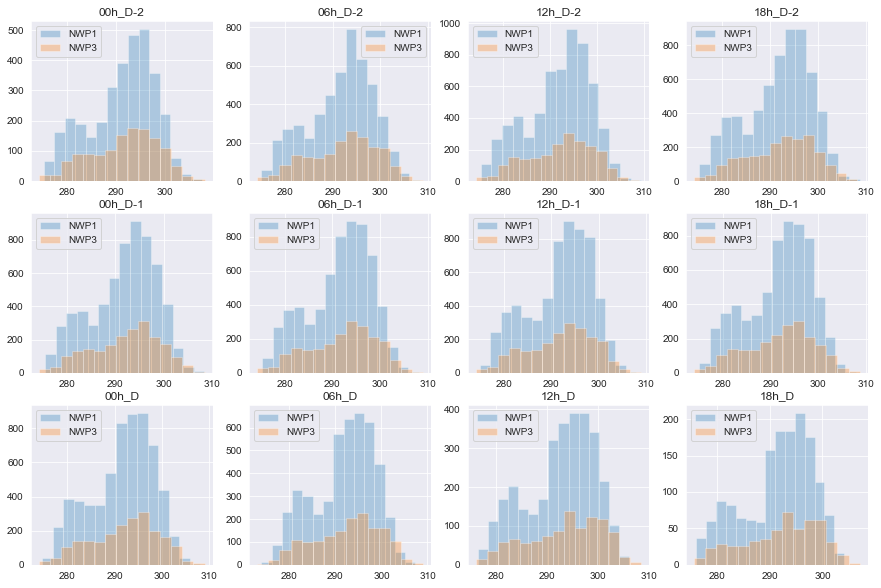

In [24]:
subhist_nwps('T')

And lastly, we just check the Cloud Cover, exclusive to the NWP 4.

Text(0.5, 1.0, 'NWP4_12h_D_CLCT')

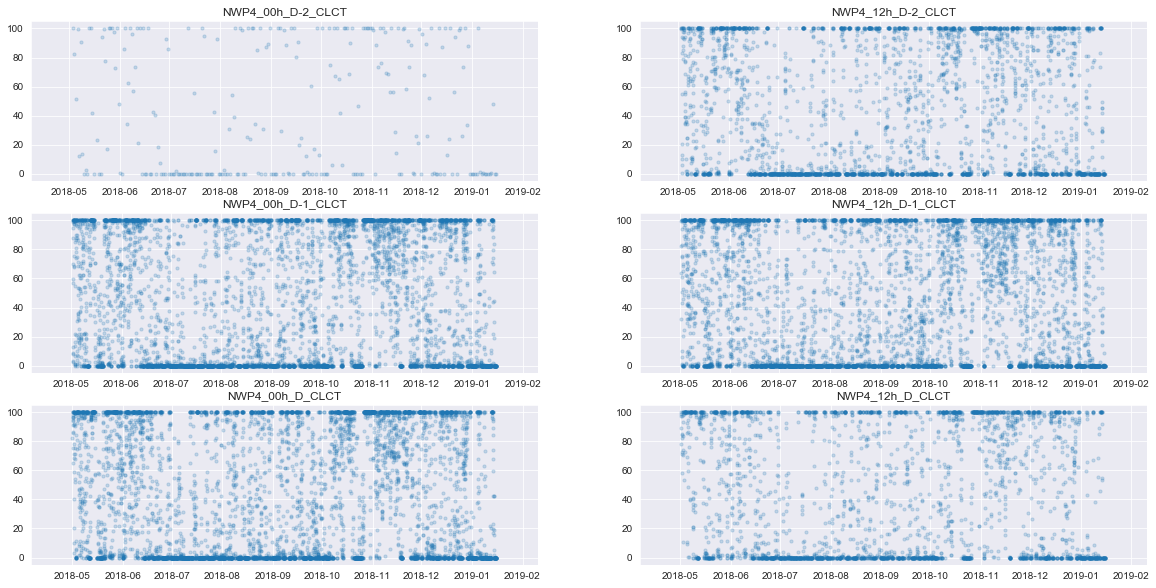

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.scatter(x_train['Time'],x_train['NWP4_00h_D-2_CLCT'],alpha=0.2,s=10,label='NWP4')
plt.title('NWP4_00h_D-2_CLCT')
plt.subplot(3,2,2)
plt.scatter(x_train['Time'],x_train['NWP4_12h_D-2_CLCT'],alpha=0.2,s=10,label='NWP4')
plt.title('NWP4_12h_D-2_CLCT')
plt.subplot(3,2,3)
plt.scatter(x_train['Time'],x_train['NWP4_00h_D-1_CLCT'],alpha=0.2,s=10,label='NWP4')
plt.title('NWP4_00h_D-1_CLCT')
plt.subplot(3,2,4)
plt.scatter(x_train['Time'],x_train['NWP4_12h_D-1_CLCT'],alpha=0.2,s=10,label='NWP4')
plt.title('NWP4_12h_D-1_CLCT')
plt.subplot(3,2,5)
plt.scatter(x_train['Time'],x_train['NWP4_00h_D_CLCT'],alpha=0.2,s=10,label='NWP4')
plt.title('NWP4_00h_D_CLCT')
plt.subplot(3,2,6)
plt.scatter(x_train['Time'],x_train['NWP4_12h_D_CLCT'],alpha=0.2,s=10,label='NWP4')
plt.title('NWP4_12h_D_CLCT')

Until now, we can conclude that the data is very similar between the predictions, which is favorable to our initial hypothesis. But evenat this point, we may loss information by juts ignoring the "raw data". So a simple solution to that is: We will continue the main pipeline using the Simplified Data, and later, when doing Ensembling we use the "raw data" as an input to to the final structure.

### Ensembling NWP's

So, at this point, we're going to do a split: 

* For a better EDA and to construct the main model, we're going to use the called Simplified Data (Similar Predictions aggregated by Mean);
* The Raw Data, however, will be used in the future on another model, in the Ensemble Structure. This will retain the information of the various predictions models contained on data.

Here, we do the proccess of obtaining the Simplified Data. This code is also included, for all the Wind Farms,
on the cnr_methods.py script to be imported in the other notebooks.

In [26]:
x_train['Set'] = 'Train'
x_test['Set'] = 'Test'

In [27]:
full_data = pd.concat([x_train,x_test])

In [28]:
U_100m = []
V_100m = []
U_10m = []
V_10m = []
T = []
CLCT = []

for column in full_data.columns:
    if (column.__contains__('U')) and (column.__contains__('NWP1') or column.__contains__('NWP2') or column.__contains__('NWP3')):
        U_100m.append(column)
    elif (column.__contains__('V')) and (column.__contains__('NWP1') or column.__contains__('NWP2') or column.__contains__('NWP3')):
        V_100m.append(column)
    elif (column.__contains__('U')) and (column.__contains__('NWP4')):
        U_10m.append(column)
    elif (column.__contains__('V')) and (column.__contains__('NWP4')):
        V_10m.append(column)
    elif (column.__contains__('_T')):
        T.append(column)
    elif (column.__contains__('CLCT')):
        CLCT.append(column)

In [29]:
full_data['U_100m'] = full_data[U_100m].mean(axis=1)
full_data['V_100m'] = full_data[V_100m].mean(axis=1)
full_data['U_10m'] = full_data[U_10m].mean(axis=1)
full_data['V_10m'] = full_data[V_10m].mean(axis=1)
full_data['T'] = full_data[T].mean(axis=1)
full_data['CLCT'] = full_data[CLCT].mean(axis=1)

In [30]:
full_data = full_data[['ID','Time','WF','U_100m','V_100m','U_10m','V_10m','T','CLCT','Set']]

In [31]:
full_data.head(5)

,ID,Time,WF,U_100m,V_100m,U_10m,V_10m,T,CLCT,Set
0,1,2018-05-01 01:00:00,WF1,-2.248500,-3.257800,1.254603,-0.289687,286.440,82.543144,Train
1,2,2018-05-01 02:00:00,WF1,-2.434500,-1.446100,2.490908,-0.413370,286.260,99.990844,Train
2,3,2018-05-01 03:00:00,WF1,-1.220571,-0.266871,0.997093,-1.415138,286.575,98.367235,Train
3,4,2018-05-01 04:00:00,WF1,3.706500,-6.217400,0.689598,-0.961441,284.780,94.860604,Train
4,5,2018-05-01 05:00:00,WF1,3.813400,-5.444600,0.290994,-0.294963,284.460,95.905879,Train


For some reason, CLCT has some Negative Values near Zero. It is assumed here that this values correspond to O.

In [1]:
full_data['CLCT'] = full_data['CLCT'].apply(lambda x: 0 if x < 0 else x)

NameError: name 'feature_data' is not defined